In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df['Change'] = round(- 100 +(df["Close"] * 100 / df["Open"]),2)

In [5]:
is_same = df["Close"] == df["Adj Close"]
is_same.value_counts()

True    1009
dtype: int64

In [6]:
df = df.drop("Adj Close", axis = 1)

In [7]:
df1 = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
 6   Change  1009 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
import matplotlib.pyplot as plt

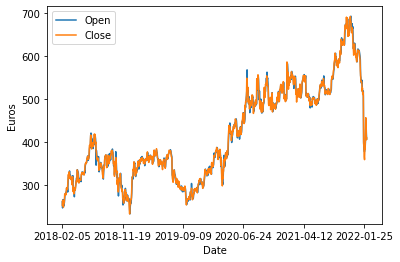

In [10]:
df.plot(x = "Date", y = ["Open","Close"], kind = "line")
plt.ylabel("Euros")
plt.show()

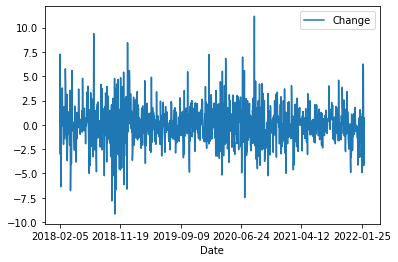

In [11]:
df.plot(x = "Date", y = "Change", kind = "line")
plt.show()

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
per_month = df.set_index("Date").groupby(pd.Grouper(freq = "M")).mean()
per_month = per_month.reset_index()

In [14]:
import seaborn as sns

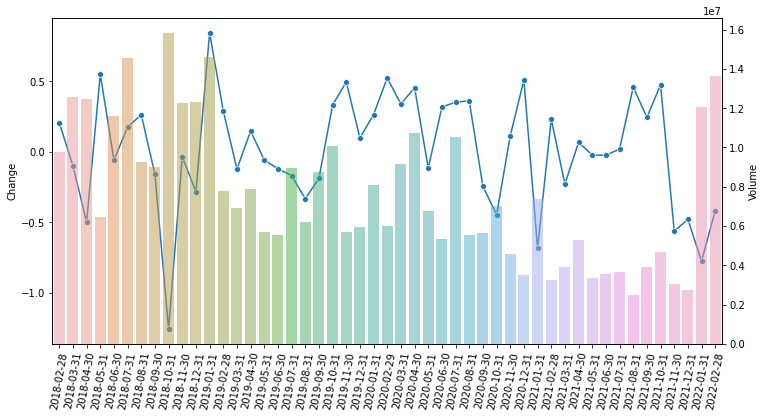

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = per_month["Change"] , marker='o', sort = False, ax=ax1)
plt.xticks(rotation = 80)
ax2 = ax1.twinx()

sns.barplot(data = per_month, x = per_month['Date'].dt.date, y = 'Volume', alpha = 0.5, ax = ax2)

plt.show()

In [16]:
pd.melt(per_month[["Close","Open","Date"]],["Date"])

,Date,variable,value
0,2018-02-28,Close,272.054705
1,2018-03-31,Close,312.228097
2,2018-04-30,Close,307.466192
3,2018-05-31,Close,331.536819
4,2018-06-30,Close,384.133336
...,...,...,...
93,2021-10-31,Open,639.220474
94,2021-11-30,Open,671.363334
95,2021-12-31,Open,611.568640
96,2022-01-31,Open,492.055000


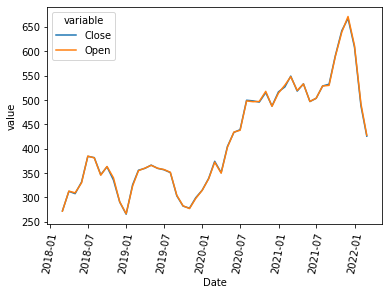

In [17]:
sns.lineplot(x = "Date", y = "value",hue = "variable", data = pd.melt(per_month[["Close","Open","Date"]],["Date"]))
plt.xticks(rotation = 80)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
df1 = df1.drop("Date",axis = 1)

In [21]:
X = df1.drop("Close",axis = 1)
y = df1["Close"]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
y_pred

array([437.92026717, 477.46011126, 275.67559411, 540.0176504 ,
       356.91139446, 609.93423649, 493.90695082, 489.97126932,
       331.9979082 , 369.74482854, 334.84448079, 318.21331649,
       447.2869548 , 533.05852394, 285.86476927, 679.61634729,
       367.55981529, 664.53651596, 289.96510433, 366.12960114,
       487.07578788, 370.35287463, 569.61353711, 553.11152805,
       479.75076992, 531.3430608 , 278.6022337 , 306.7433634 ,
       692.10269931, 580.52655796, 496.90194175, 502.54031295,
       495.44153311, 509.88474462, 273.73001794, 356.16791956,
       309.97023892, 551.57604934, 323.50611503, 385.42848031,
       373.67270846, 339.35618896, 380.87312127, 283.71542587,
       344.52234711, 478.59069978, 635.64484731, 528.27650152,
       561.33882347, 398.10523203, 365.02292402, 360.33884374,
       581.78454635, 503.21228665, 507.34367038, 501.82550589,
       605.57492173, 293.82211311, 316.31958875, 556.18890361,
       354.92891564, 397.89417871, 503.40518099, 414.19

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [27]:
Validation = [["MSE:",  mean_squared_error(y_test,y_pred)], ["RMAE:",  np.sqrt(mean_absolute_error(y_test,y_pred))],
              ["MAE:", mean_absolute_error(y_test,y_pred)], ["r2:",  r2_score(y_test,y_pred)]]

In [28]:
for name,val in Validation :
    val = val
    print(name, round(val,3))

MSE: 3.645
RMAE: 1.166
MAE: 1.36
r2: 1.0


In [29]:
def style():
    plt.figure(facecolor = "black",figsize = (15,10))
    ax = plt.axes()
    ax.tick_params(axis = "x", colors = "white")
    ax.tick_params(axis = "y", colors = "white")
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")

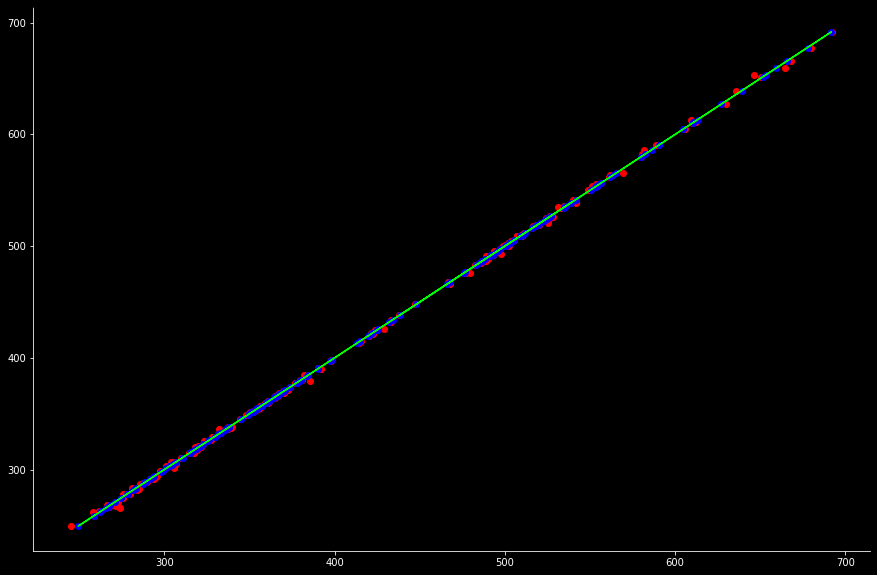

In [30]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')